In [4]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew,kurtosis
import numpy as np
from scipy import signal
from scipy.stats import iqr

def get_metric(x):
    f,pxx = signal.welch(x,fs=25,nperseg=len(x),nfft=10000)
    pxx = np.abs(pxx)
    pxx = pxx/max(pxx)
    peaks_loc1,_ = signal.find_peaks(pxx[np.where((f>.8)&(f<2.5))[0]],height=.01)
    peaks_loc2,_ = signal.find_peaks(pxx,height=.01)
    if len(peaks_loc1)==0:
        return -1
    elif len(peaks_loc1)==1 and len(peaks_loc2)==1:
        return 1
    else:
        return 0

final_data = pickle.load(open('./data_saved/temp_data_for_mperf.p','rb'))

<IPython.core.display.Javascript object>


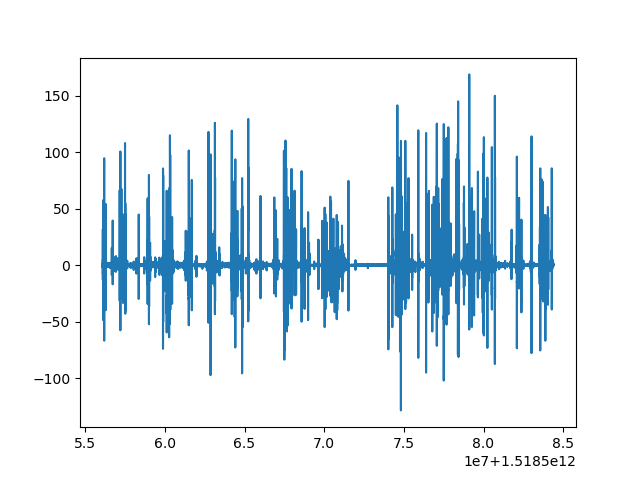

<IPython.core.display.Javascript object>


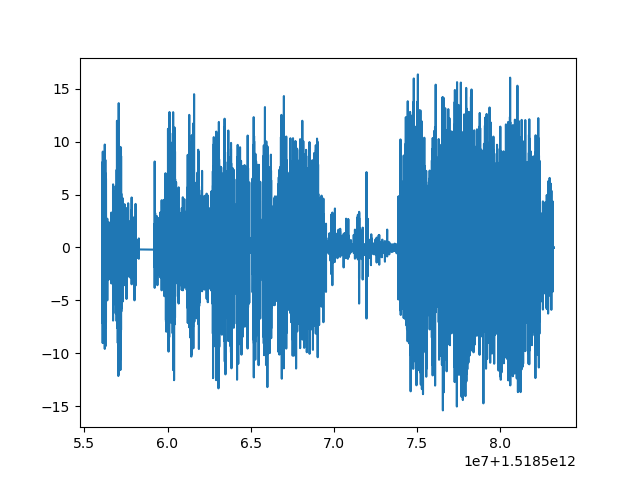

<IPython.core.display.Javascript object>


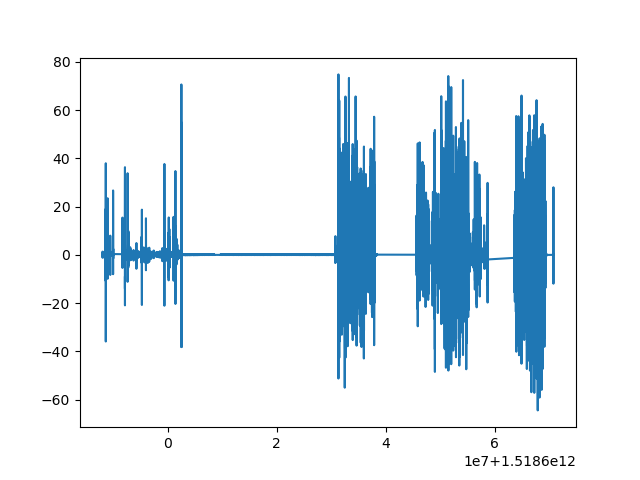

<IPython.core.display.Javascript object>


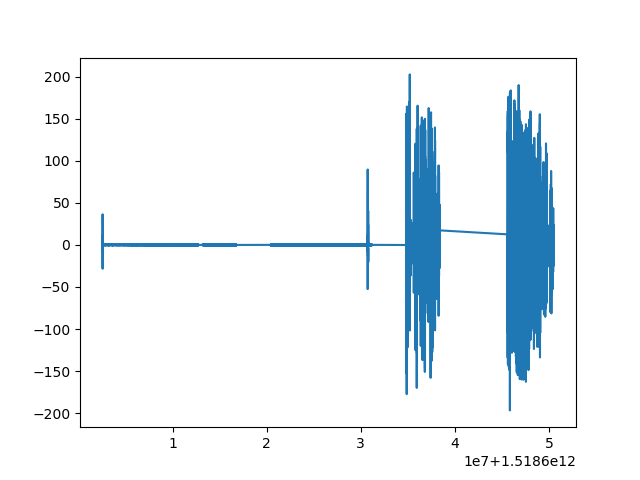

<IPython.core.display.Javascript object>


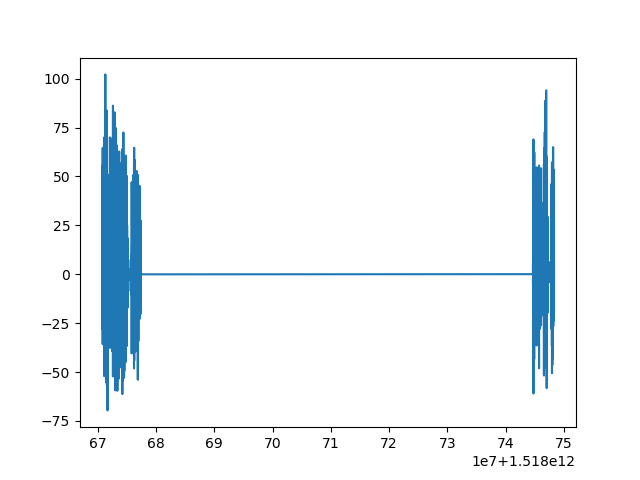

<IPython.core.display.Javascript object>


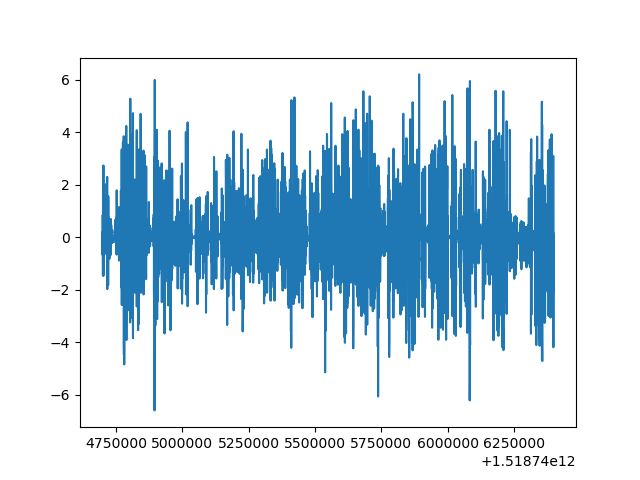

<IPython.core.display.Javascript object>


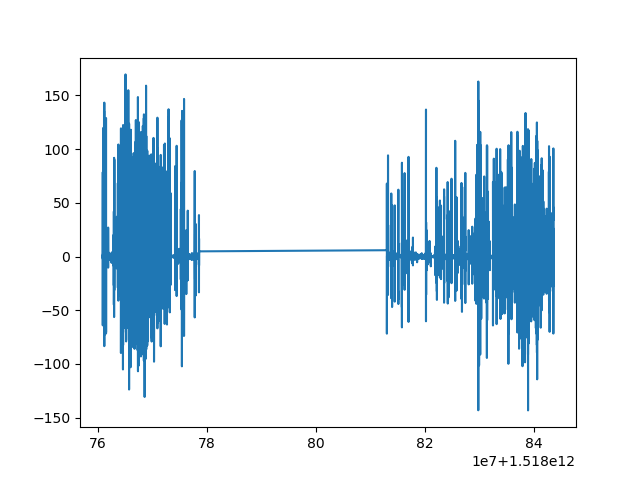

<IPython.core.display.Javascript object>


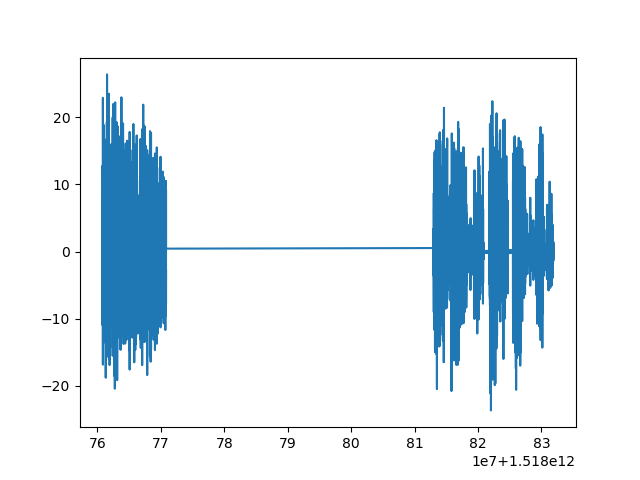

<IPython.core.display.Javascript object>


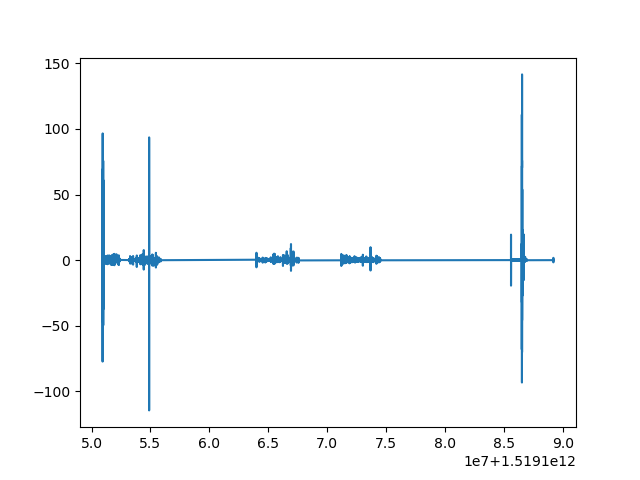

<IPython.core.display.Javascript object>


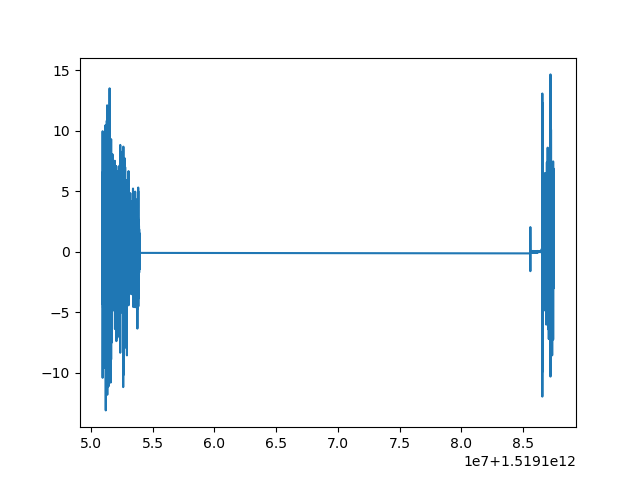

<IPython.core.display.Javascript object>


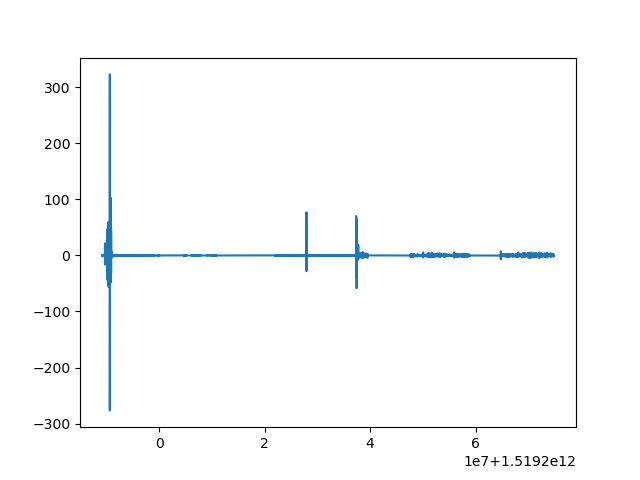

<IPython.core.display.Javascript object>


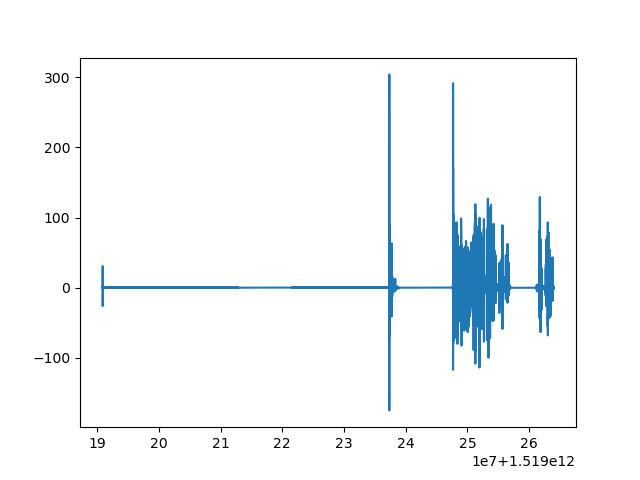

<IPython.core.display.Javascript object>


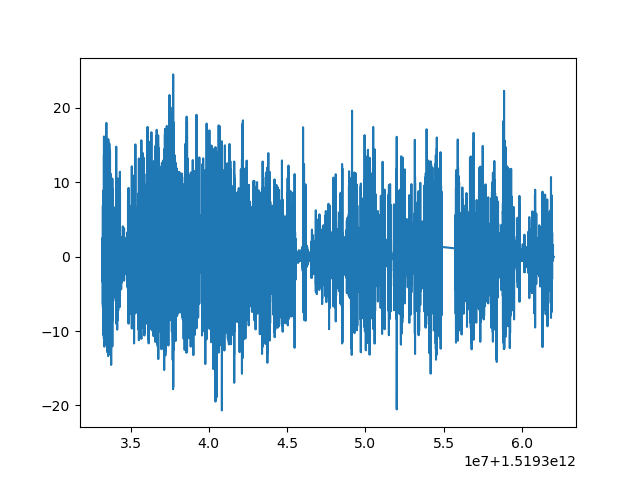

<IPython.core.display.Javascript object>


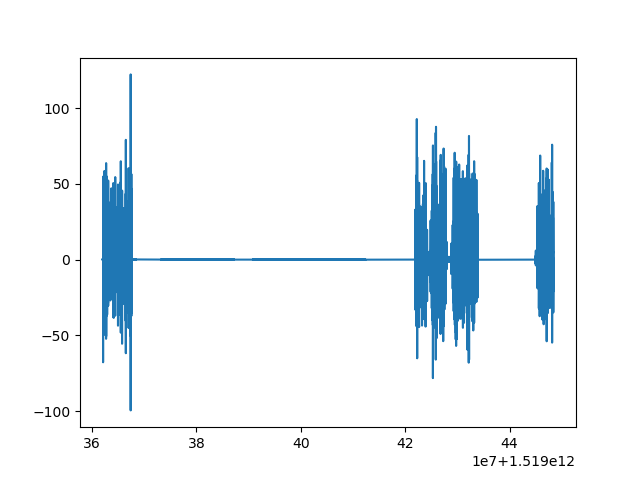

<IPython.core.display.Javascript object>


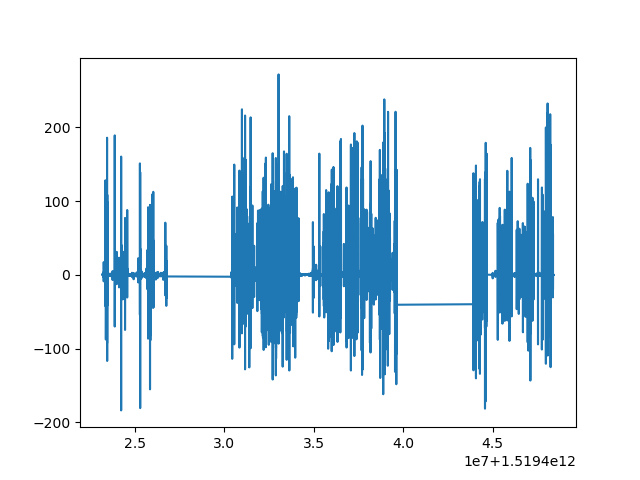

<IPython.core.display.Javascript object>


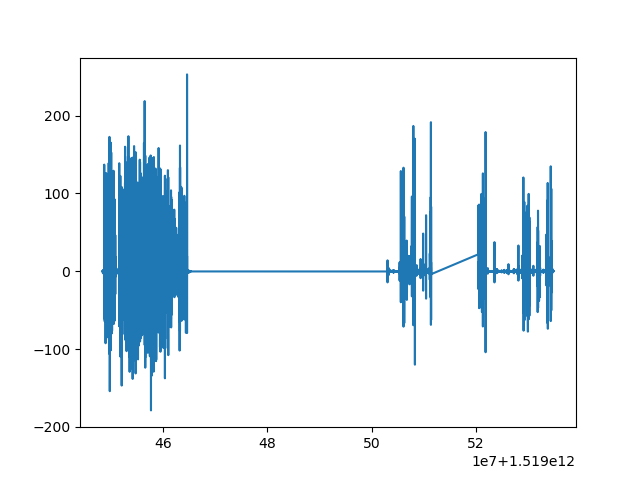

<IPython.core.display.Javascript object>


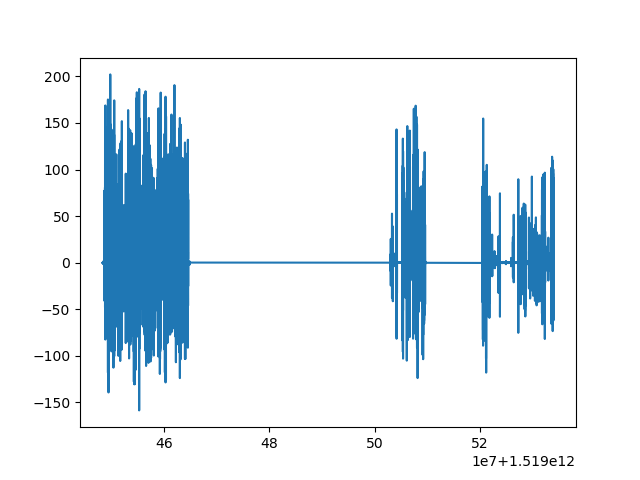

<IPython.core.display.Javascript object>


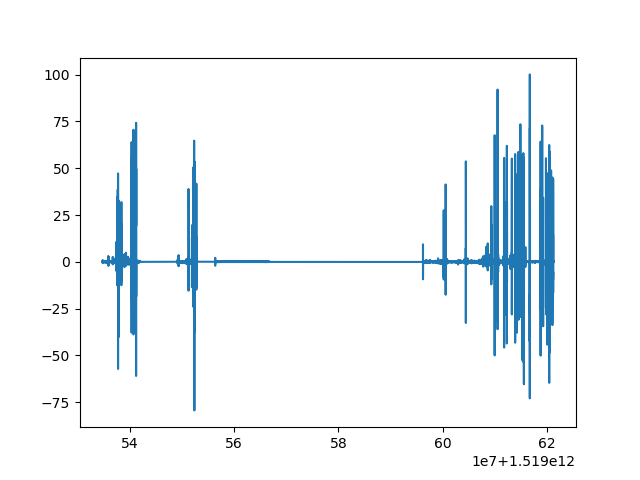

<IPython.core.display.Javascript object>


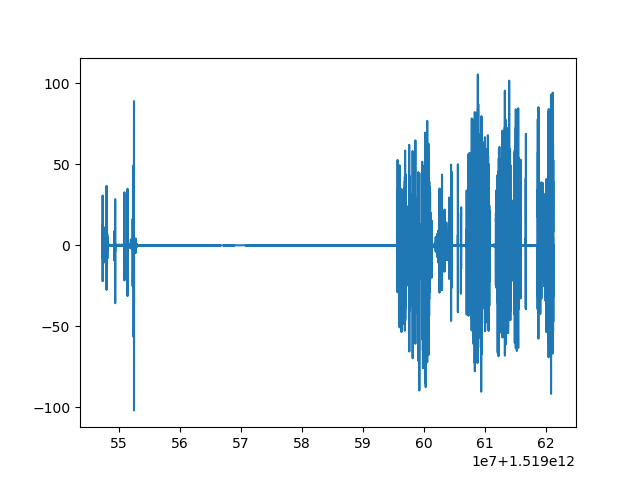

<IPython.core.display.Javascript object>


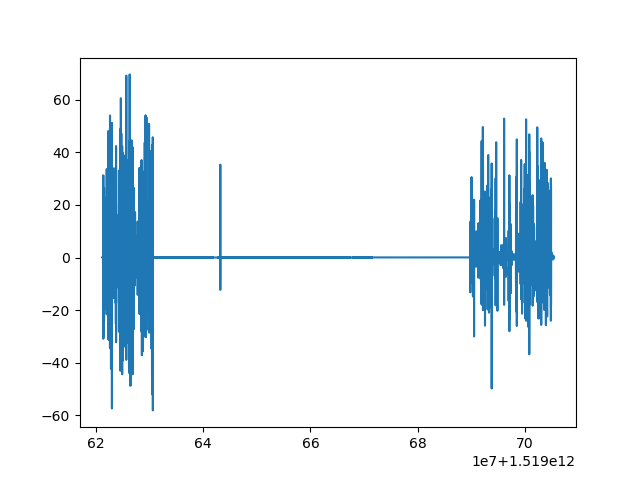

/home/mullah/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


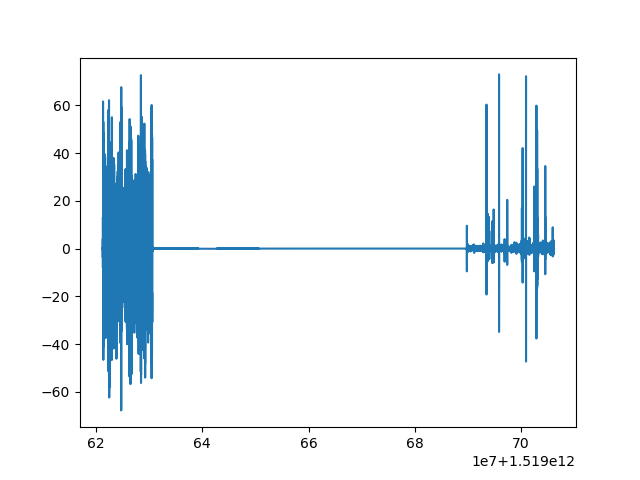

<IPython.core.display.Javascript object>


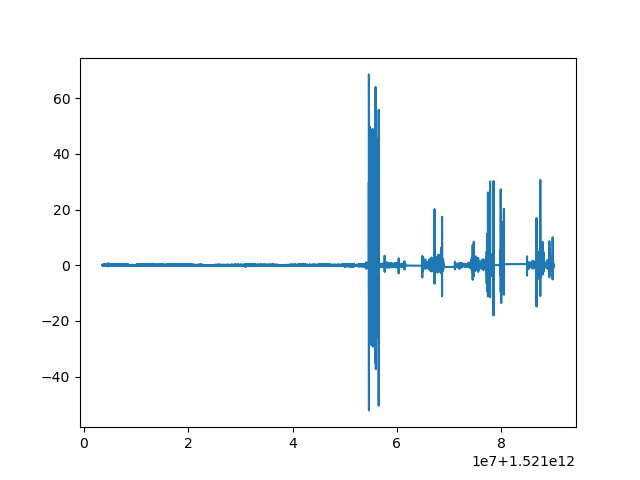

<IPython.core.display.Javascript object>


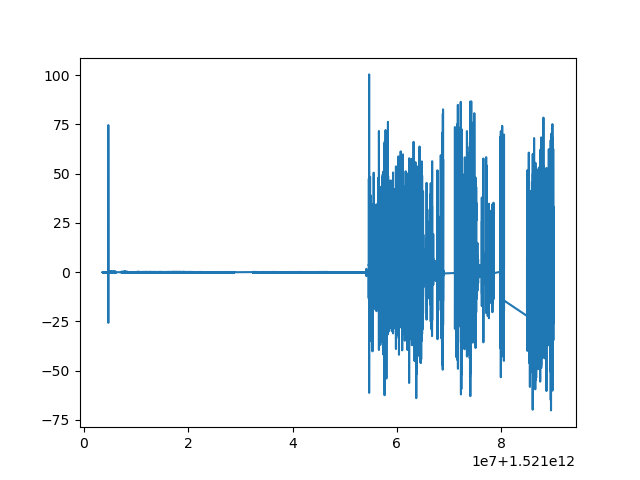

<IPython.core.display.Javascript object>


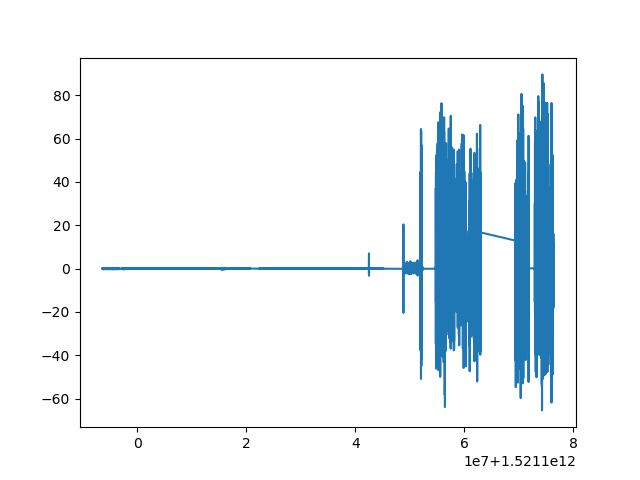

<IPython.core.display.Javascript object>


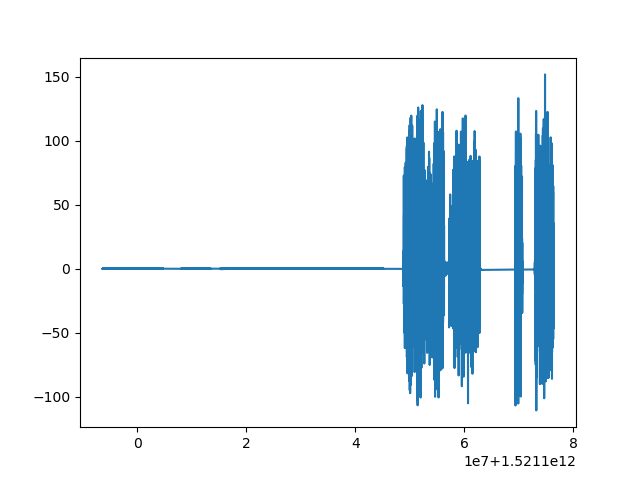

<IPython.core.display.Javascript object>


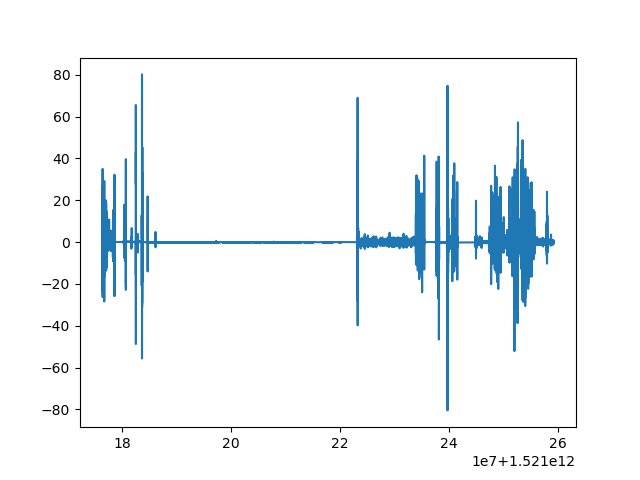

<IPython.core.display.Javascript object>


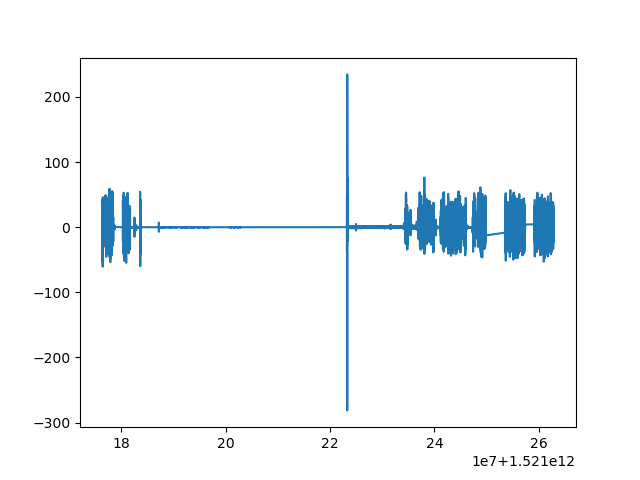

<IPython.core.display.Javascript object>


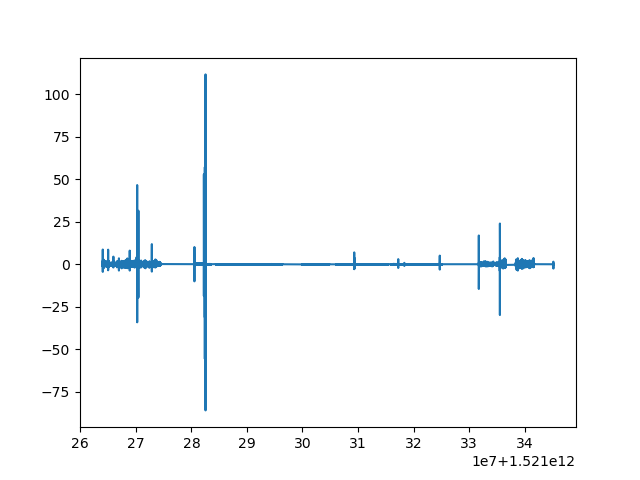

<IPython.core.display.Javascript object>


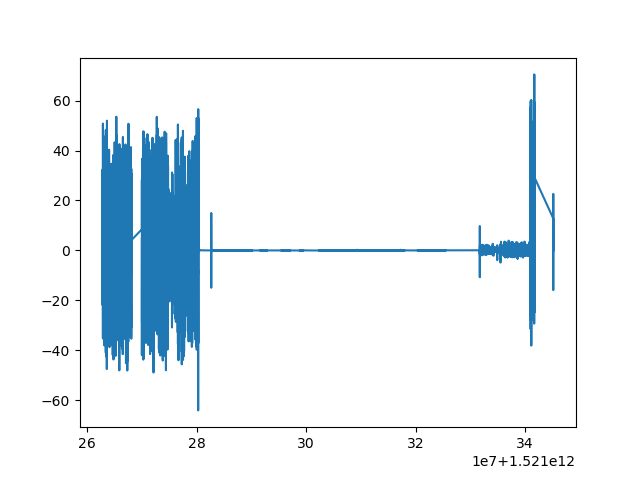

<IPython.core.display.Javascript object>


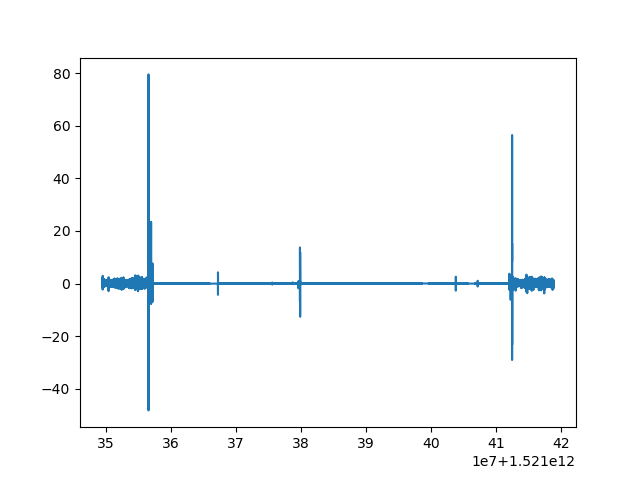

<IPython.core.display.Javascript object>


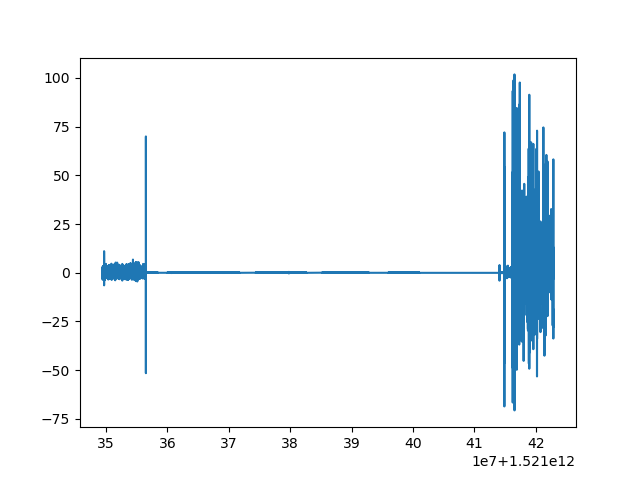

<IPython.core.display.Javascript object>


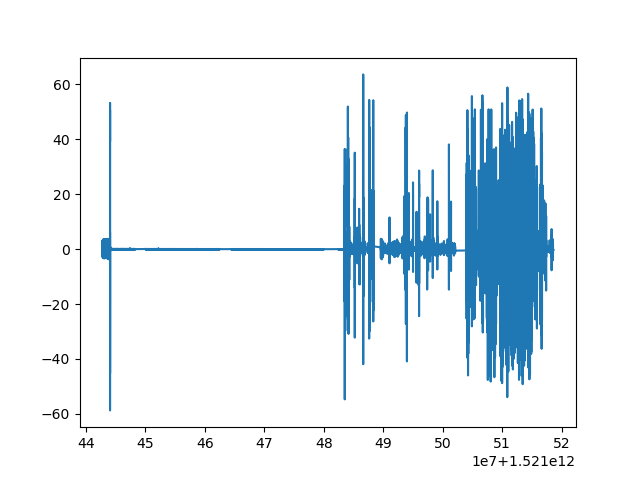

<IPython.core.display.Javascript object>


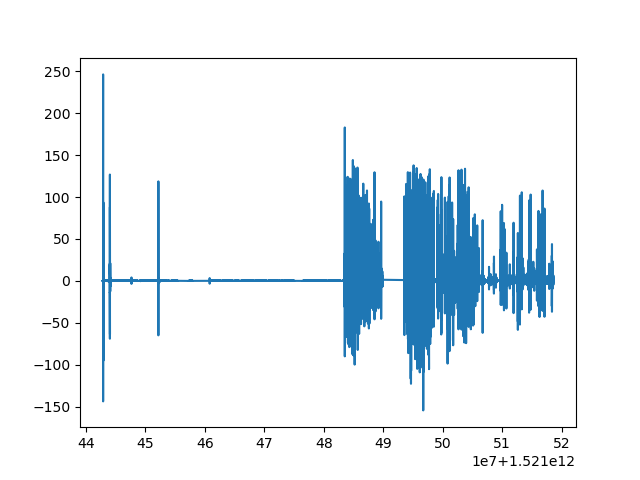

<IPython.core.display.Javascript object>


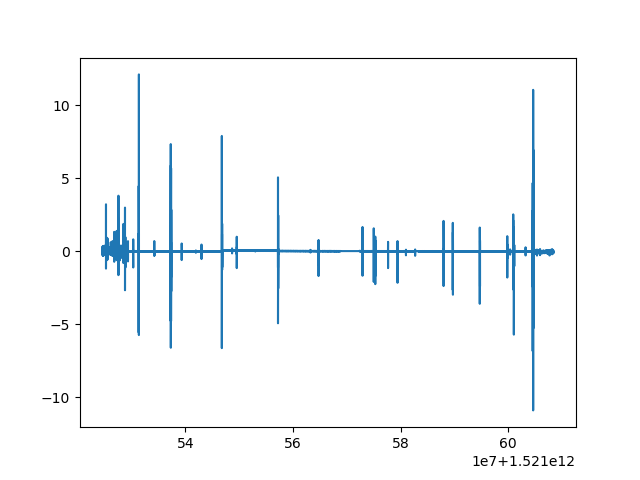

<IPython.core.display.Javascript object>


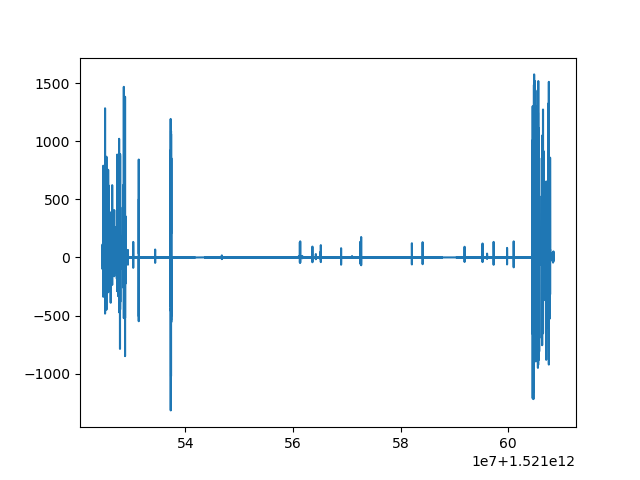

<IPython.core.display.Javascript object>


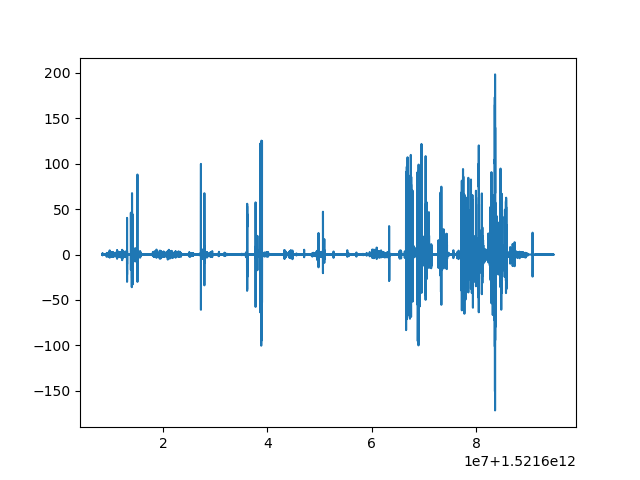

<IPython.core.display.Javascript object>


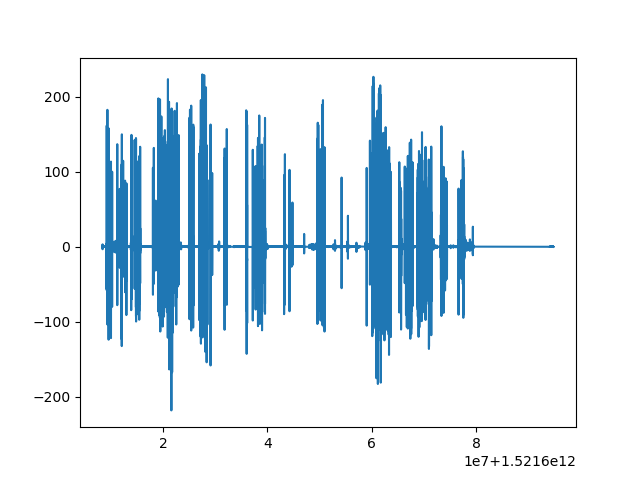

In [5]:
%matplotlib notebook
destination_dir = './data_images_jhu/'
data_col = {}
count = 0
for a in final_data:
    wrist_data = a[:2]
    ecg_rr = a[2]
    for ppg_data in wrist_data:        
        if len(ppg_data)==0:
            continue
        ts_array = np.arange(ppg_data[0,0],ppg_data[0,0]+3600*1000,2.5*1000)
        plt.figure()
        plt.plot(ppg_data[:,0],ppg_data[:,4])
        plt.show()
#         for i,t in enumerate(ts_array[:-1]):
#             index = np.where((ppg_data[:,0]>=t)&(ppg_data[:,0]<t+2.5*1000))[0]
#             if len(index) < .66*25*2.5:
#                 continue
#             ppg_window = ppg_data[index,:]
#             ppg_window[:,2:5] = RobustScaler().fit_transform(ppg_window[:,2:5])
#             window = np.concatenate([ppg_window[:,0].reshape(-1,1),signal.detrend(ppg_window[:,4]).reshape(-1,1)],
#                                     axis=1)
#             m = get_metric(window[:,1])
#             if m==-1:
#                 plt.figure()
#                 plt.plot((window[:,0]-window[0,0])/1000,window[:,1])
#                 plt.show()
#             plt.savefig(final_path_1+str(count)+'.png')
#             plt.close('all')
#             data_col[str(count)] = window
#             count+=1
    #             pickle.dump(data_col,open(final_path_1+'window_col.p','wb'))
    #         except Exception as e:
    #             print(e)
    #             continue

#### 